In [1]:
import math
import random

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
ROBOT_T = 0.16
ROBOT_L = 0.14
WHEEL_R = 0.065/2

In [3]:
graphDt = 0.01

In [72]:
a = 1.5 * WHEEL_R * 2 * math.pi
v = 0.2

r = 0.4

d = 0.5432154321

### Linear Motion

In [73]:
def linearTrapezoid(d,vMax,a):
    # Return keypoints in velocity profile
    accelTime = vMax/a
    
    accelD = accelTime*vMax
    dLeft = d - accelD
    
    if(dLeft >= 0):
        
        coastTime = float(dLeft) / vMax
        return np.array([[0.0,0.0], [accelTime, vMax], [accelTime+coastTime, vMax], [accelTime+coastTime+accelTime,0.0]])
    else:
        
        accelTime = math.sqrt(d / a)
        vCoast = accelTime * a
        return np.array([[0.0,0.0], [accelTime, vCoast], [accelTime+accelTime, 0.0]])

In [74]:
def linearInterp(profile, t):
    # Check sorted by time
    if(np.all(np.diff(profile[:,0]) < 0)):
        # Decreasing time
        raise ValueError("Time not sorted")
    
    n = len(profile)
    # Get t section
    t = np.expand_dims(t,0)
    
    profileT = np.expand_dims(profile[:,0], -1)
    profileV = np.expand_dims(profile[:,1], -1)
    
    pre = t >= profileT
    post = t <= profileT
    
    v = np.zeros((t.shape[1]), dtype=np.float)
    
    # Check inside of range
    insideMask = np.logical_and(np.any(post, axis=0), np.any(pre, axis=0))
    
    preInd = n-np.argmax(pre[::-1], axis=0)-1
    postInd = np.argmax(post, axis=0)

    # Same
    sameMask = preInd == postInd
    
    mask = np.logical_and(sameMask, insideMask)
    v[mask] = profile[preInd[mask],1]
    
    # Interpolate Mask
    # Preind always less than postind in sorted list
    interpMask = preInd < postInd
    mask = np.logical_and(interpMask, insideMask)
    tPre = profile[preInd[mask],0]
    tPost = profile[postInd[mask],0]
    
    vPre = profile[preInd[mask],1]
    vPost = profile[postInd[mask],1]
    
    dt = np.divide(t[0][mask] - tPre, tPost - tPre)
    v[mask] = np.multiply(dt, vPost - vPre) + vPre
    
    return v

In [75]:
def profileArea(profile):
    area = 0.0
    for n in range(len(profile) - 1):
        area += 0.5*(profile[n][1] + profile[n+1][1])*(profile[n+1][0] - profile[n][0])
    return area

In [76]:
vProfile = linearTrapezoid(d,v,a)

In [77]:
vProfile

array([[0.        , 0.        ],
       [0.65294336, 0.2       ],
       [2.71607716, 0.2       ],
       [3.36902052, 0.        ]])

In [78]:
profileArea(vProfile)

0.5432154321

In [79]:
t = np.arange(0, vProfile[-1,0], graphDt)
graphSampleV = linearInterp(vProfile,t)
traj = np.cumsum(graphSampleV) * graphDt

In [80]:
traj

array([0.00000000e+00, 3.06305284e-05, 9.18915851e-05, 1.83783170e-04,
       3.06305284e-04, 4.59457926e-04, 6.43241096e-04, 8.57654794e-04,
       1.10269902e-03, 1.37837378e-03, 1.68467906e-03, 2.02161487e-03,
       2.38918121e-03, 2.78737808e-03, 3.21620548e-03, 3.67566340e-03,
       4.16575186e-03, 4.68647084e-03, 5.23782035e-03, 5.81980039e-03,
       6.43241096e-03, 7.07565205e-03, 7.74952368e-03, 8.45402583e-03,
       9.18915851e-03, 9.95492172e-03, 1.07513155e-02, 1.15783397e-02,
       1.24359945e-02, 1.33242798e-02, 1.42431957e-02, 1.51927421e-02,
       1.61729190e-02, 1.71837264e-02, 1.82251644e-02, 1.92972329e-02,
       2.03999319e-02, 2.15332614e-02, 2.26972215e-02, 2.38918121e-02,
       2.51170333e-02, 2.63728849e-02, 2.76593671e-02, 2.89764798e-02,
       3.03242231e-02, 3.17025969e-02, 3.31116012e-02, 3.45512360e-02,
       3.60215014e-02, 3.75223973e-02, 3.90539237e-02, 4.06160806e-02,
       4.22088681e-02, 4.38322861e-02, 4.54863346e-02, 4.71710137e-02,
      

In [81]:
accProfile = np.diff(np.concatenate([graphSampleV, [0]])) / graphDt

In [82]:
accProfile

array([ 0.30630528,  0.30630528,  0.30630528,  0.30630528,  0.30630528,
        0.30630528,  0.30630528,  0.30630528,  0.30630528,  0.30630528,
        0.30630528,  0.30630528,  0.30630528,  0.30630528,  0.30630528,
        0.30630528,  0.30630528,  0.30630528,  0.30630528,  0.30630528,
        0.30630528,  0.30630528,  0.30630528,  0.30630528,  0.30630528,
        0.30630528,  0.30630528,  0.30630528,  0.30630528,  0.30630528,
        0.30630528,  0.30630528,  0.30630528,  0.30630528,  0.30630528,
        0.30630528,  0.30630528,  0.30630528,  0.30630528,  0.30630528,
        0.30630528,  0.30630528,  0.30630528,  0.30630528,  0.30630528,
        0.30630528,  0.30630528,  0.30630528,  0.30630528,  0.30630528,
        0.30630528,  0.30630528,  0.30630528,  0.30630528,  0.30630528,
        0.30630528,  0.30630528,  0.30630528,  0.30630528,  0.30630528,
        0.30630528,  0.30630528,  0.30630528,  0.30630528,  0.30630528,
        0.09015656,  0.        ,  0.        ,  0.        ,  0.  

<IPython.core.display.Javascript object>


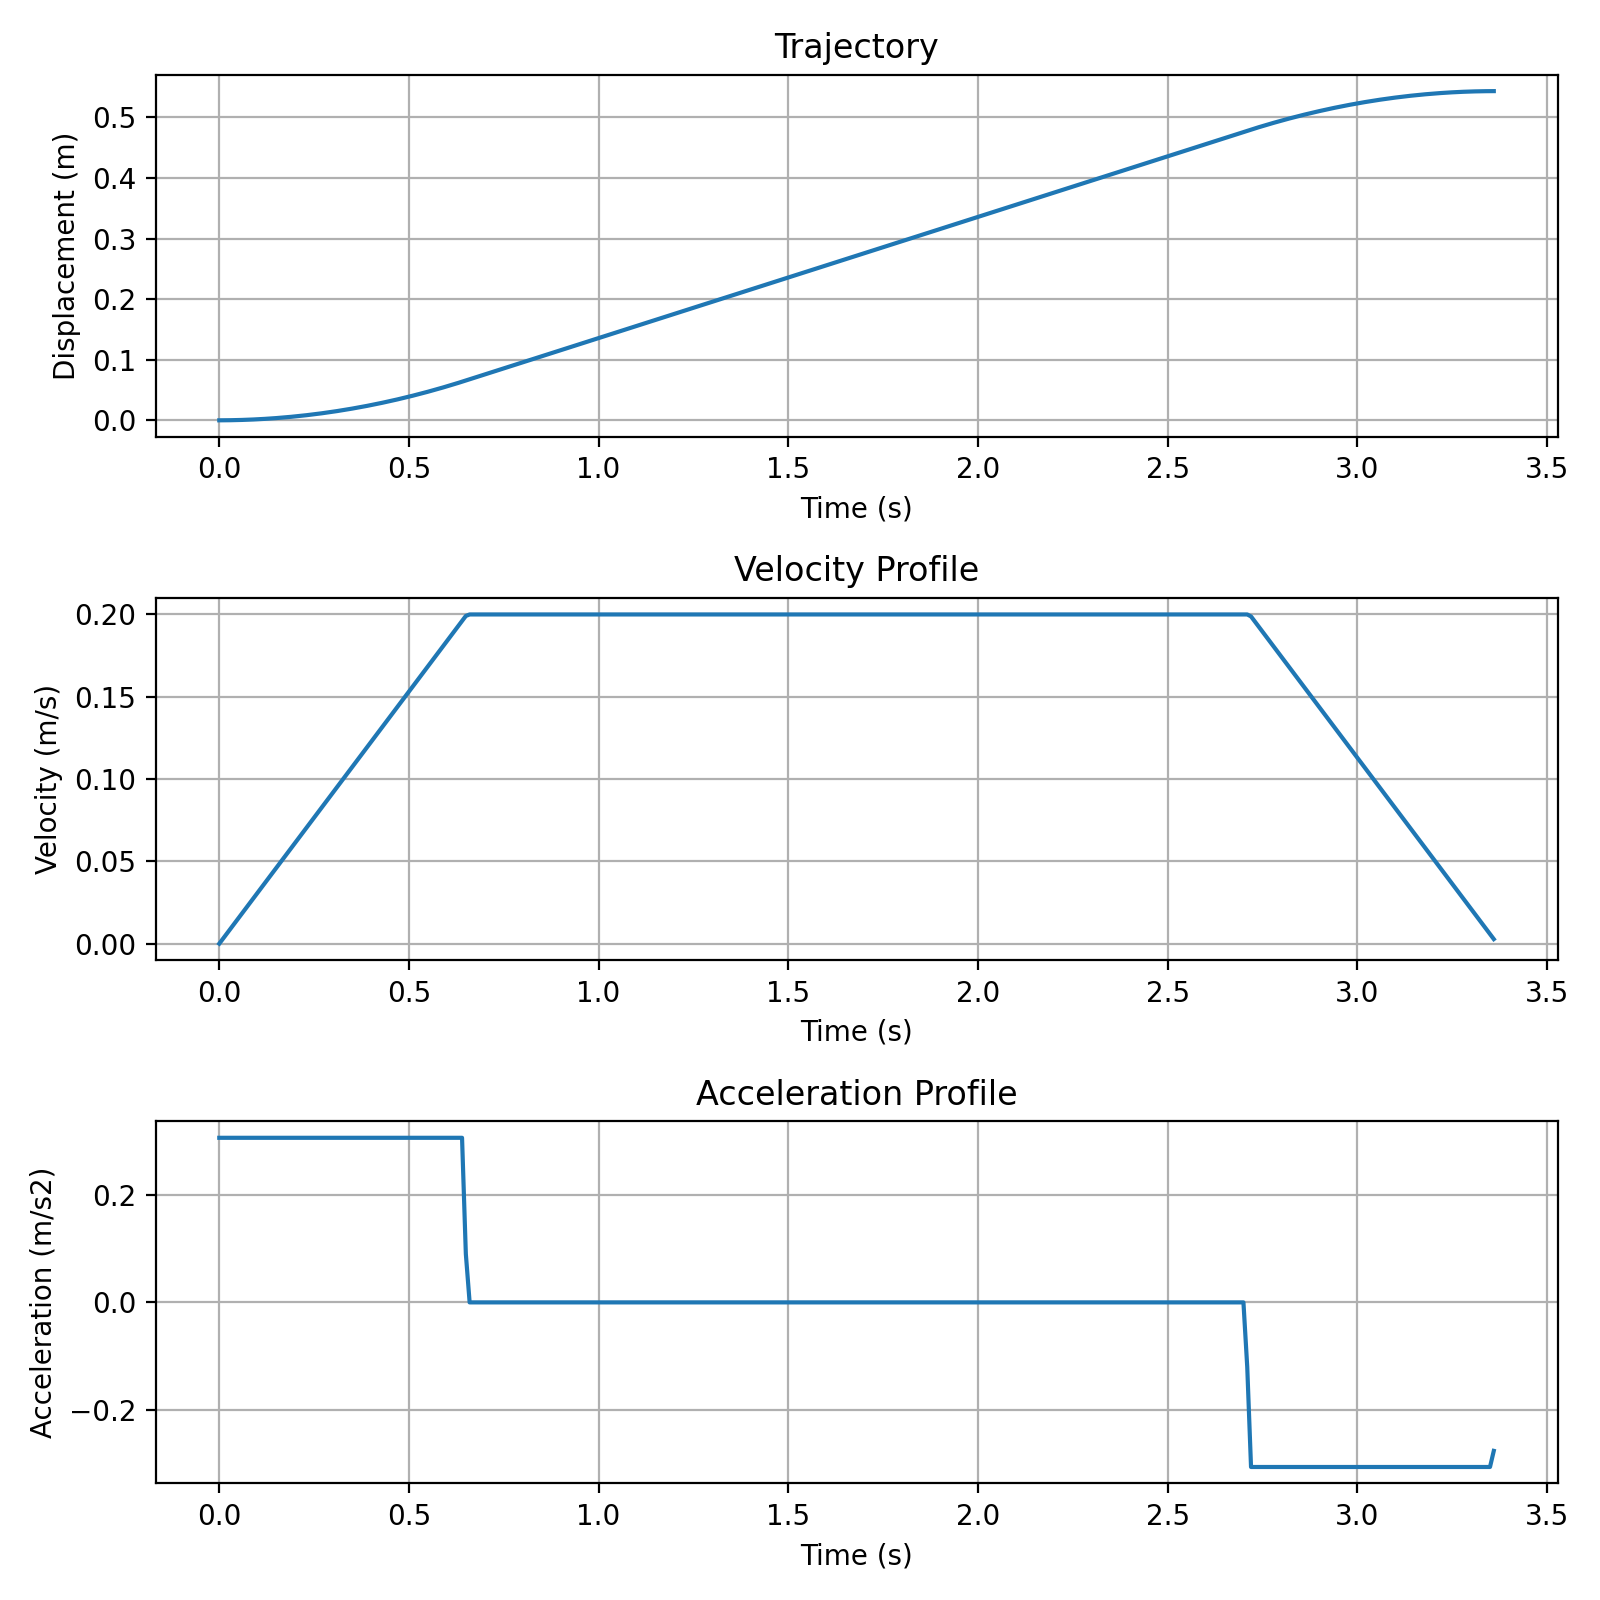

In [83]:
fig1, ax1 = plt.subplots(nrows=3, ncols=1, figsize=(8,8))

ax1[0].plot(t, traj)
ax1[0].set_title("Trajectory")
ax1[0].set_xlabel("Time (s)")
ax1[0].set_ylabel("Displacement (m)")
ax1[0].grid()

ax1[1].plot(t, graphSampleV)
ax1[1].set_title("Velocity Profile")
ax1[1].set_xlabel("Time (s)")
ax1[1].set_ylabel("Velocity (m/s)")
ax1[1].grid()

ax1[2].plot(t, accProfile)
ax1[2].set_title("Acceleration Profile")
ax1[2].set_xlabel("Time (s)")
ax1[2].set_ylabel("Acceleration (m/s2)")
ax1[2].grid()

plt.tight_layout()

### Plot Disrete Steps

In [84]:
dt = 0.2

In [85]:
t = np.arange(0, vProfile[-1,0]+1, dt)

In [86]:
discreteVel = linearInterp(vProfile, t)

In [87]:
discreteTraj = np.cumsum(discreteVel) * dt
discreteAcce = np.diff(np.concatenate([discreteVel, [0]])) / dt

<IPython.core.display.Javascript object>


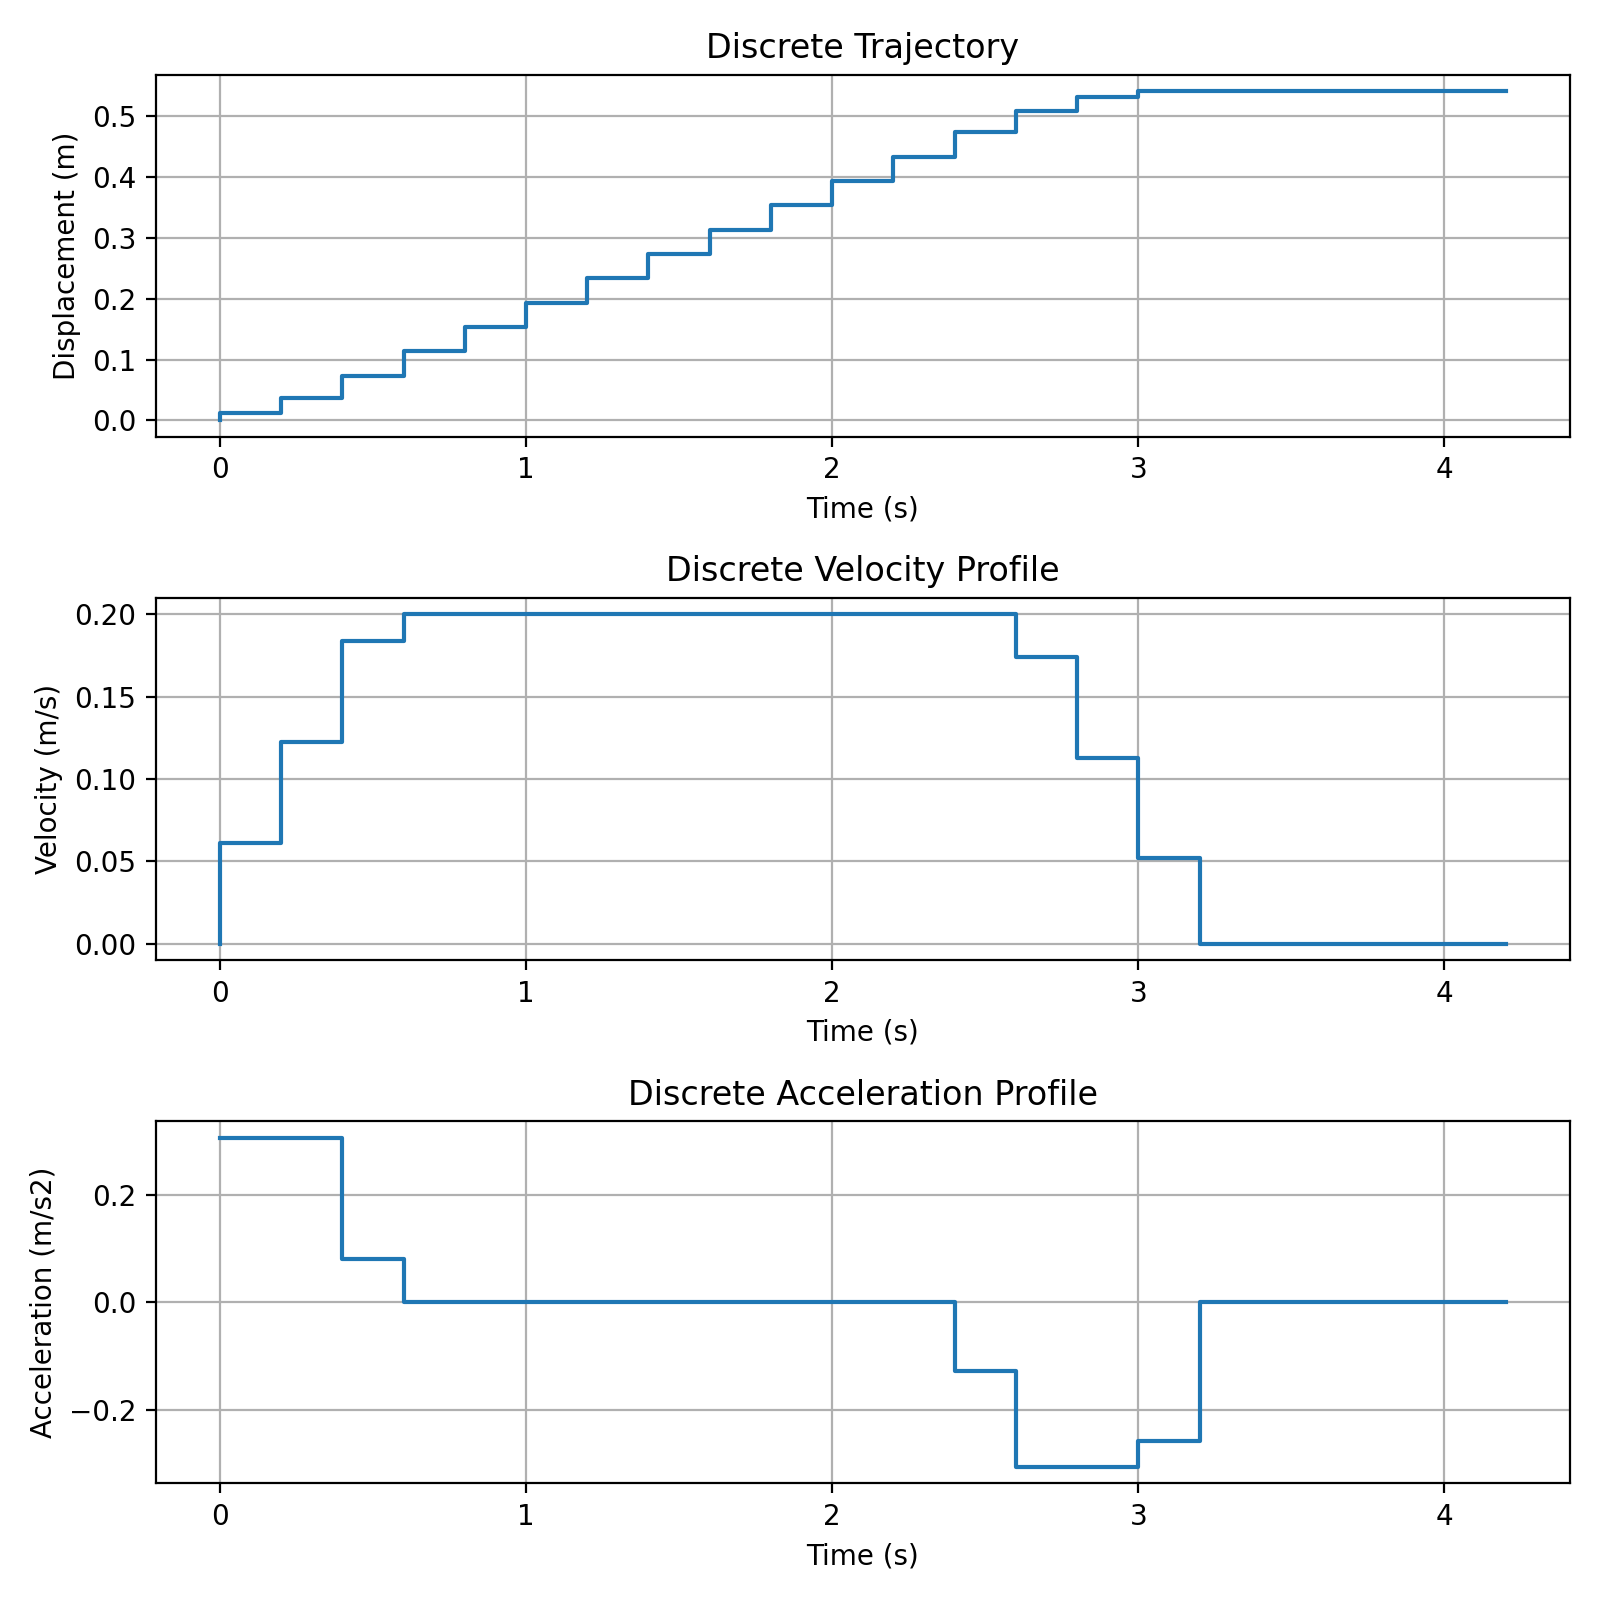

In [88]:
fig2, ax2 = plt.subplots(nrows=3, ncols=1, figsize=(8,8))

ax2[0].step(t, discreteTraj)
ax2[0].set_title("Discrete Trajectory")
ax2[0].set_xlabel("Time (s)")
ax2[0].set_ylabel("Displacement (m)")
ax2[0].grid()

ax2[1].step(t, discreteVel)
ax2[1].set_title("Discrete Velocity Profile")
ax2[1].set_xlabel("Time (s)")
ax2[1].set_ylabel("Velocity (m/s)")
ax2[1].grid()

ax2[2].step(t, discreteAcce)
ax2[2].set_title("Discrete Acceleration Profile")
ax2[2].set_xlabel("Time (s)")
ax2[2].set_ylabel("Acceleration (m/s2)")
ax2[2].grid()

plt.tight_layout()

In [89]:
(180/math.pi) * discreteTraj[-1] / r

77.54024461716952

### Discretize Velocity Profile with Sample Order Hold

In [19]:
dt = 0.03

In [20]:
def zeroOrderHold(profile, t):
    # Check sorted by time
    if(np.all(np.diff(profile[:,0]) < 0)):
        # Decreasing time
        raise ValueError("Time not sorted")
    
    n = len(profile)
    # Get t section
    t = np.expand_dims(t,0)
    
    profileT = np.expand_dims(profile[:,0], -1)
    profileV = np.expand_dims(profile[:,1], -1)
    
    pre = t >= profileT
    post = t <= profileT
    
    v = np.zeros((t.shape[1]), dtype=np.float)
    
    # Check inside of range
    insideMask = np.logical_and(np.any(post, axis=0), np.any(pre, axis=0))

    preInd = n-np.argmax(pre[::-1], axis=0)-1
    postInd = np.argmax(post, axis=0)
    v[insideMask] = profile[preInd[insideMask],1]
    
    return v

In [21]:
t = np.arange(0, vProfile[-1,0]+1, dt)

In [22]:
discreteVel = zeroOrderHold(vProfile, t)

In [23]:
discreteVel

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. ])

In [24]:
discreteTraj = np.cumsum(discreteVel) * dt
discreteAcce = np.diff(np.concatenate([discreteVel, [0]])) / dt

<IPython.core.display.Javascript object>


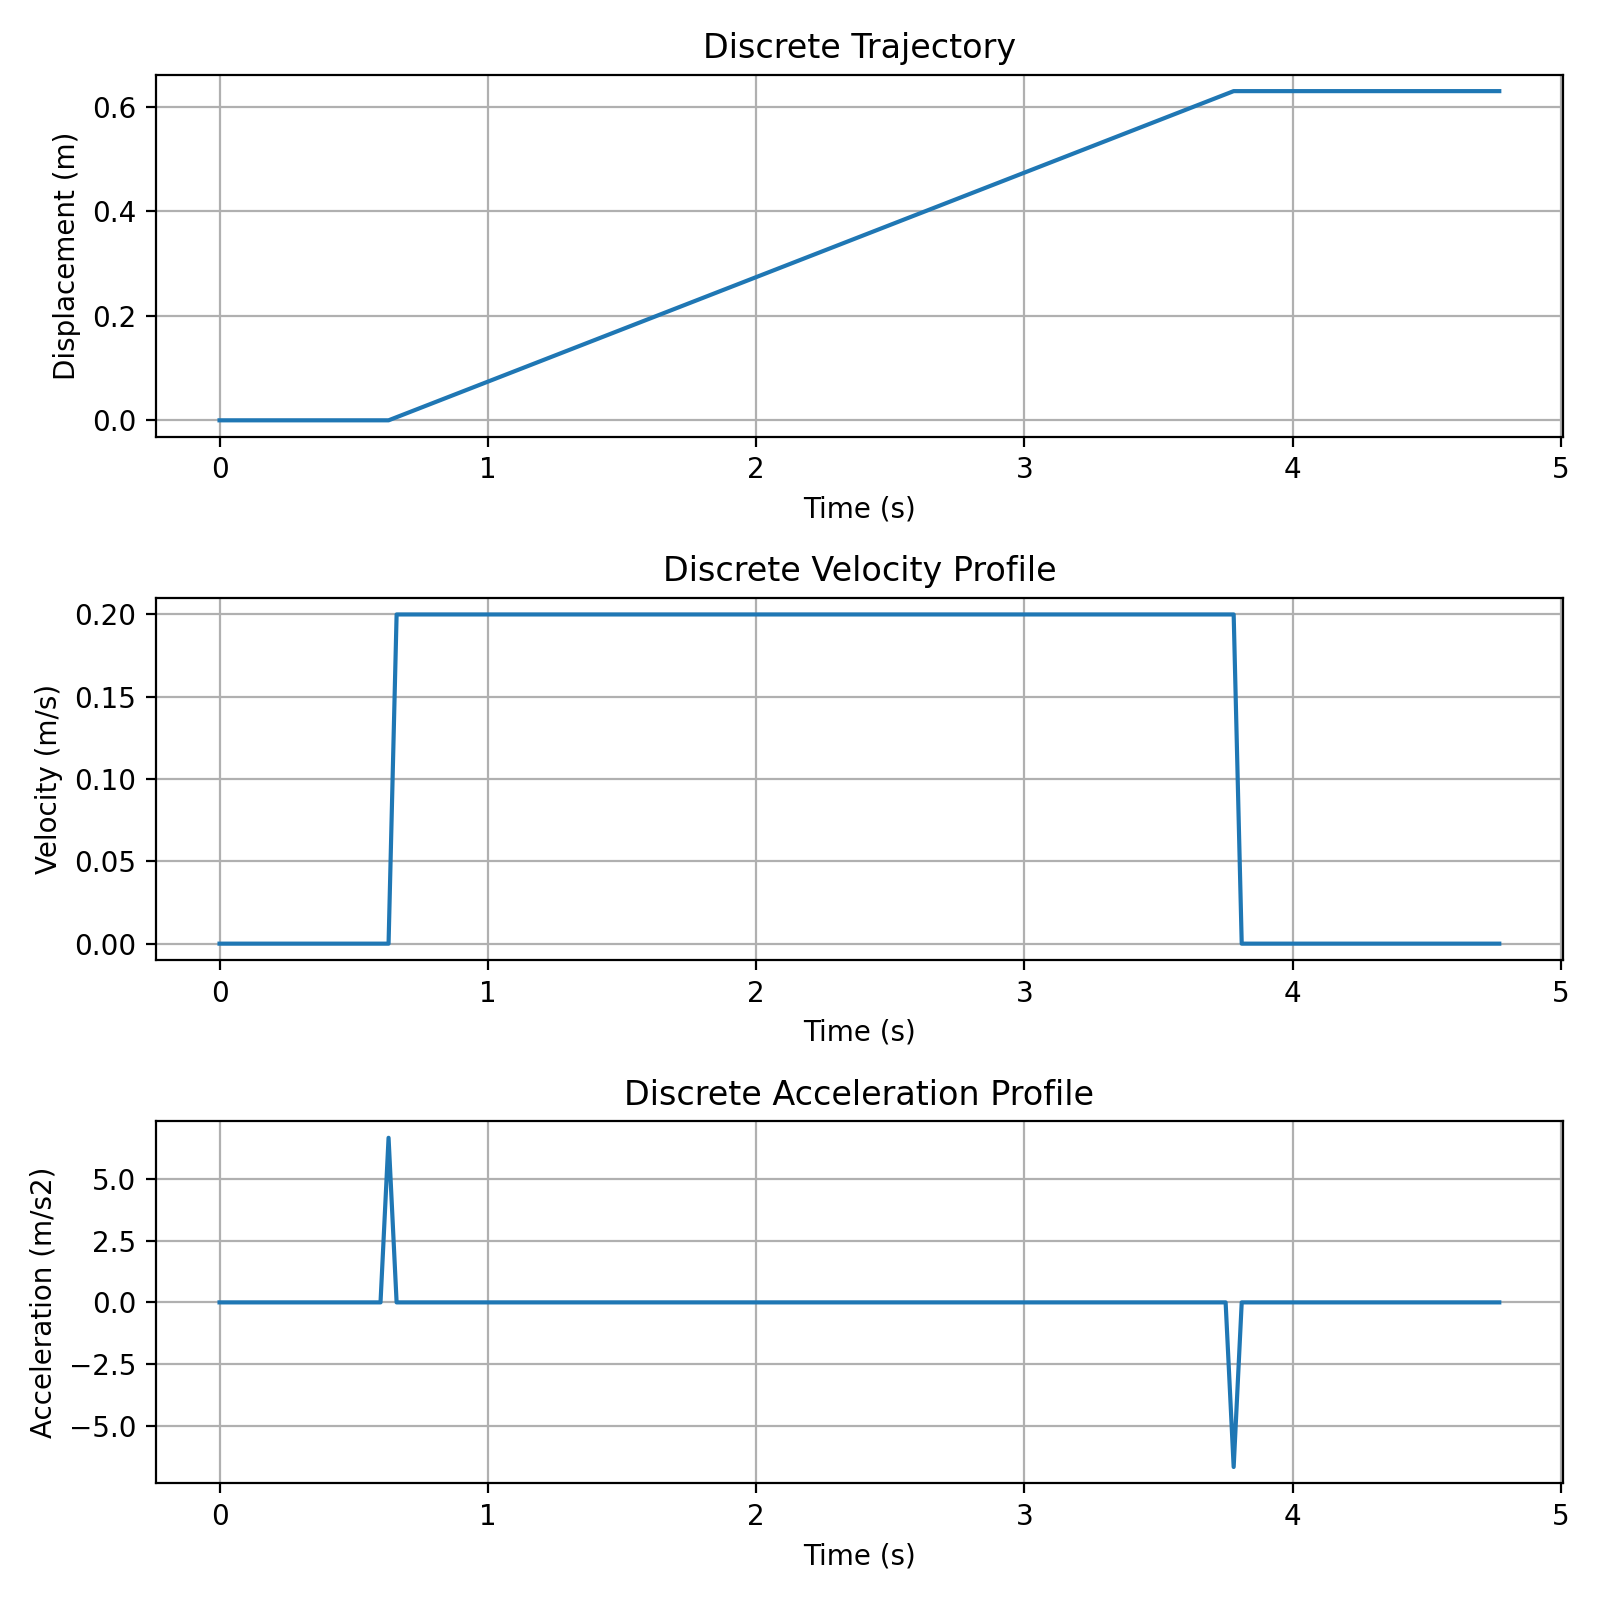

In [25]:
fig3, ax3 = plt.subplots(nrows=3, ncols=1, figsize=(8,8))

ax3[0].plot(t, discreteTraj)
ax3[0].set_title("Discrete Trajectory")
ax3[0].set_xlabel("Time (s)")
ax3[0].set_ylabel("Displacement (m)")
ax3[0].grid()

ax3[1].plot(t, discreteVel)
ax3[1].set_title("Discrete Velocity Profile")
ax3[1].set_xlabel("Time (s)")
ax3[1].set_ylabel("Velocity (m/s)")
ax3[1].grid()

ax3[2].plot(t, discreteAcce)
ax3[2].set_title("Discrete Acceleration Profile")
ax3[2].set_xlabel("Time (s)")
ax3[2].set_ylabel("Acceleration (m/s2)")
ax3[2].grid()

plt.tight_layout()